## Predicting Hepatitis C: Patterns in Liver Panel Tests for Diagnosing and Staging




### Introduction
The Goal of this project is to build a model that can effectively classify Hepatitis C status and severity from a data set of liver functional panel tests. Hepatitis C is a virus known to cause liver damage, cancer, and can lead to irreversible liver failure. It is commonsly spread through blood to blood contact with an infected person- most commonly by sharing needles used in intravenous drug use/ other methods used to inject drugs or in rare cases via blood transfusion. Other less commmon methods of transmission are sexual or with nicks or cuts caused by sharing nail clippers and/or tooth brushes with an infected person. There is a cure for Hepatitis C with a 95% effectiveness rate however many people go unscreened and pass the disease to others before receiving a diagnosis.
A liver function panel test is a routine blood panel that is commonly completed at annual physical exams. Medical providers will order it to determine the internal state of the liver and is helpful in diagnosing a variety of internal conditions. Currently, the CDC recommends testing for Hepatitis C once in a persons life after age 18 or older. However, if a person were to test negative once and contract Hepatitis C later in life it may not register for a provider to screen again.

The data set categories each patient into four categoreis, 0= Blood donor (hep c negative), 0s= Suspected Blood Donor (hep c negative), 1=Hepatitis (Hep C+ with liver inflammation), 2=Fibrosis (Hep C+ with advanced liver damanage), 3= Cirrhosis (Hep C+ with liver failure)

It will be interesting to investigate how well the model can accurately classify each participant's status based on their features (the multiple tests that are included in a liver function panel). On a broader scope, when abnormal liver function test values appear on a patient's results, it could potentially trigger Medical Providers to test for Hepatits C when it was previously not considered during an initial visit.



### Data Description


The data set contains laboratory values of blood donors and Hepatitis C patients and UCI Machine Learning Repository: 
https://archive.ics.uci.edu/ml/datasets/HCV+data

https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset


### Data Cleaning & Preprocessing 


**Cleaning**

**Problem 1: Inconsistent Data Types and Redundancies**
The dataset contained inconsistent data types and redundancies that needed to be addressed for accurate analysis. For instance, the Category column, initially a string type, was mapped to Numerical_Category during preprocessing. Additionally, the redundant default index category was dropped.

**Problem 2: Handling Null Values**
The ALP and ALT columns had the highest number of null values, potentially compromising model integrity, particularly given the small number of Hepatitis C positive patients. To preserve as many Hepatitis C positive patients as possible, the ALP and CHOL columns were dropped due to their high number of null values. Rows with missing values in the PROT, ALB, and ALT columns were dropped since each had only one missing value.


**Problem 3: Data Distribution and Patient Count**
The dataset was skewed, with 615 patients in total and only 75 positive for Hepatitis C, leading to imbalanced class issues in the model. Summary statistics were used to understand data skewness, and during preprocessing, the majority class was undersampled to balance the dataset.

**In Conclusion**
Initially, the dataset had 615 patients (rows) and 13 columns. After data cleaning, the dataset had 612 patients with 11 columns, including 72 Hepatitis C positive patients.



**Preprocessing**

**Encoding:**

The Categorical variable of 'Sex' was encoded using one-hot encoding to convert them into dummy variables.  A dictionary was created to map categorical values of the 'Category' column to numerical codes, resulting in a new 'Category_Numeric' column. This column revealed a significant imbalance, with the majority class (Hep C negative) comprising about 75% of the dataset. To address this imbalance, the majority class was undersampled to match the size of the largest minority class using the resample method from scikit-learn. The undersampled majority class was then combined with the minority classes to create a balanced dataset, which was shuffled to ensure randomness. This balanced dataset was then used for model training to improve the reliability and accuracy of Hepatitis C predictions.

BALANCED Dataset "Category_Numeric"

28 in class 0

23 in class 1 

21 in class 2

28 in class 3

vs. 

IMBALANCED Dataset (original)

540 in class 0 

23 in class 1 

21 in class 2

28 in class 3

**Feature Scaling:**

Numerical features were standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1. 

**Training/Splitting**

The dataset was split 80/20 with 80% (80 samples) used to train and 20% (20 samples for testing). Using SKLearn Train_Test_Split

### Exploratory Data Analysis (EDA)


During the Exploratory Data Analysis (EDA), it was observed that the features Age, ALB, CHE, and PROT were evenly distributed. In contrast, ALT, AST, BIL, CREA, and GGT displayed outliers, resulting in a right-skewed distribution. These outliers are likely due to patients who are Hepatitis C positive (numerical categories 1, 2, 3), as abnormal liver tests are common in this group. The histograms of these features provided valuable insights into which variables to focus on during the modeling phase.

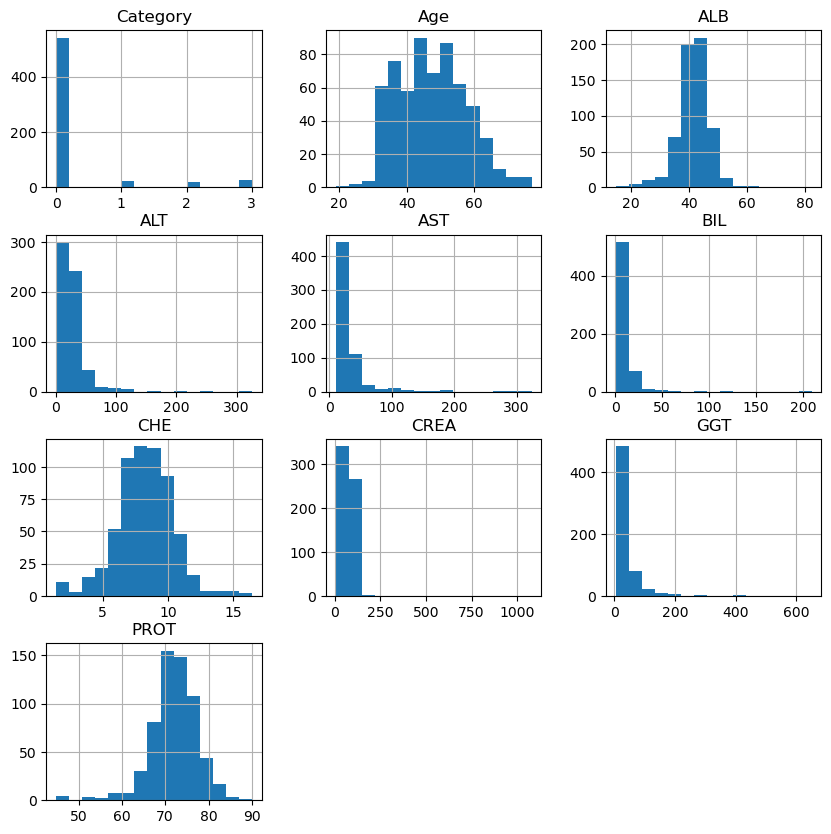

The heatmap revealed significant correlations among several features, notably AST with Category, ALB with PROT, GGT with AST, and AST with BIL, indicating their potential importance in the predictive modeling process.


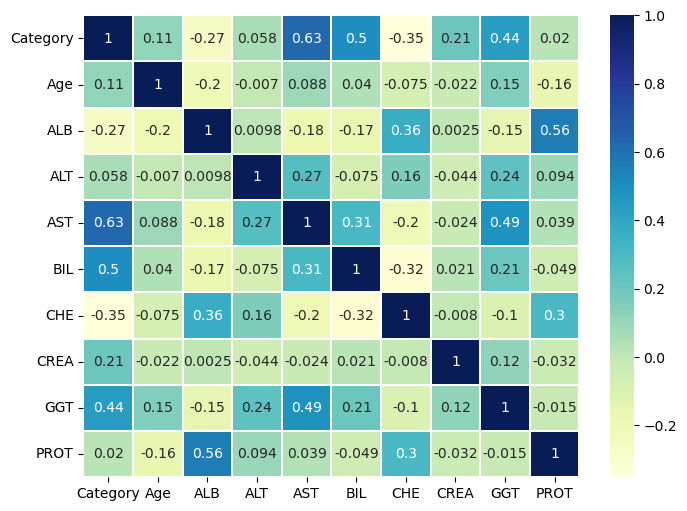

### Modeling


**Gini Impurity Model**



Parameters Used as indicated per GridSearch 
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}

Accuracy: 0.65

Balanced accuracy: 0.7214285714285714

Precision score: 0.7408333333333333

Recall score: 0.65

F1 score: 0.6357352941176471

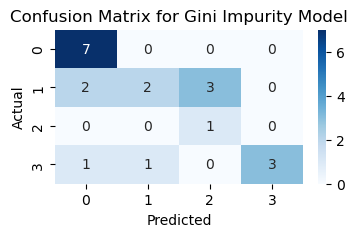




Cross-validation scores: [0.45 0.55 0.65 0.6  0.5 ]

Mean cross-validation score: 0.55

Standard deviation of cross-validation scores: 0.07071067811865477


The Gini Impurity Model showed low- moderate performance with reasonable precision but lower consistency across cross-validation folds. The variability in cross-validation scores indicates some instability, suggesting room for improvement.

**Entropy Model**

Parameters used as indicated per GridSearch DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, random_state=42)

Accuracy: 0.7

Balanced accuracy: 0.5571428571428572

Precision score: 0.7322222222222223

Recall score: 0.7

F1 score: 0.7034722222222223


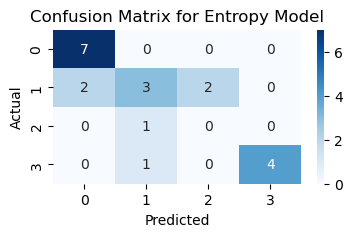

The Entropy Model demonstrated low-moderate overall performance with high accuracy and precision, but its balanced accuracy was lower, indicating potential issues with adjustments made to class imbalance. The recall and F1 scores were strong, suggesting effective identification of positive cases.

**Random Forest Model (RFM)**

Parameters used as indicated per GridSearch
Best parameters found:  RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)

Accuracy: 0.75

Balanced accuracy: 0.8214285714285714

Precision score: 0.8847222222222222

Recall score: 0.75

F1 score: 0.7318055555555556



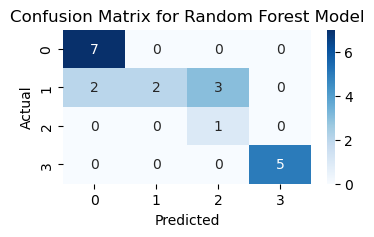

Cross-validation scores: [0.75 0.5  0.65 0.8  0.7 ]

Mean cross-validation score: 0.68

Standard deviation of cross-validation scores: 0.10295630140987003

The Random Forest Model performed well with high accuracy, balanced accuracy, and precision, reflecting its strong predictive capabilities. While the mean cross-validation score is moderate, the variability suggests some inconsistency. Overall, it is effective in identifying positive cases and managing the adjustments made to address the class imbalance.


**Support Vector Machine (SVM)**


Best Parameters found using GridSearch: C=0.2, kernel=’linear’, probability=True,random_state=42)

Accuracy: 0.7

Balanced accuracy: 0.7714285714285714

Precision score: 0.8393939393939395

Recall score: 0.7

F1 score: 0.675


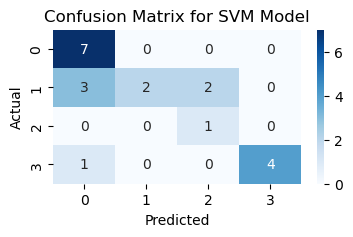

Cross-validation scores: [0.625  0.5625 0.625  0.6875 0.875 ]

Mean cross-validation score: 0.675

Standard deviation of cross-validation scores: 0.10752906583803283

The SVM model showed moderate performance with good precision but lower recall and F1 score. Its cross-validation results indicated some variability, suggesting inconsistent performance across data splits.



### Comparison of Models
After evaluating multiple machine learning models, the Random Forest model proves to be the most effective classifier for this dataset. It outperforms the Support Vector Machine (SVM) model based on Accuracy, Balanced Accuracy, Precision, Recall, and F1 Score. When assessing performance using Cross Validation, both models show variability. However, the Random Forest's higher mean cross-validation score indicates better overall performance. Although the SVM has a lower standard deviation, suggesting more consistent results, the Random Forest model's superior mean score highlights its better generalization capability across different data subsets.


### Feature Analysis


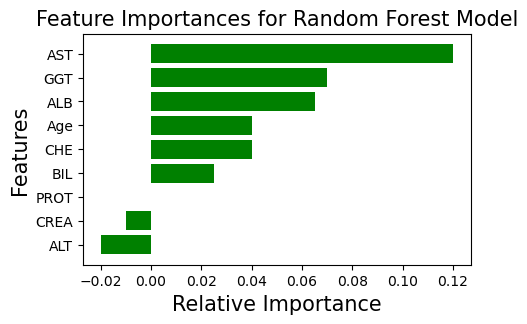

The two most important features that the RFM identified were AST and GGT, both enzymes produced by the liver. This finding aligns with expectations, as elevated levels of AST and GGT often indicate liver damage or bile duct issues. Given that Hepatitis C progressively damages the liver, increased levels of these enzymes are consistent with the disease’s effects. Both AST and GGT were highly correlated in the heatmap and showed skewed histograms with valuable insights and outliers. Thus, it is logical that the model identified these features as significant predictors.


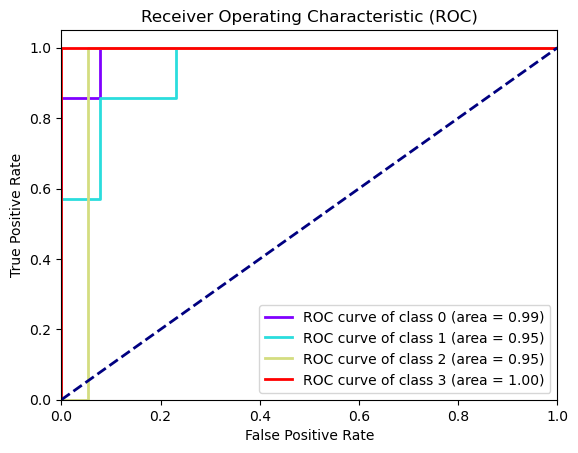

### Conclusion
After evaluating multiple machine learning models, including Gini Impurity, Entropy, Random Forest (RFM), and Support Vector Machine (SVM), the Random Forest model proved to be the most effective classifier for this dataset. It outperformed the SVM in terms of accuracy, balanced accuracy, precision, recall, and F1 score. 

The confusion matrix for RFM showed that Class 0 had the highest accuracy and Class 3 was perfectly classified. Class 1 had some confusion with Class 2. Overall, the model achieved an accuracy of 0.75, balanced accuracy of 0.82, precision of 0.88, recall of 0.75, and an F1 score of 0.73, indicating strong performance with room for improvement in recall and F1 score.


The ROC/AUC scores were excellent, with Class 0 at 0.99, Class 1 and Class 2 at 0.95, and Class 3 at 1.00, showing superior class discrimination. However,the cross-validation results, ranging from 0.50 to 0.80 with a mean score of 0.68, suggested some overfitting and sensitivity to data splits.
To enhance the model, exploring SMOTE for class balance, focusing on advanced feature engineering, implementing k-fold cross-validation, and considering Gradient Boosting could be beneficial. The RFM's strength in classifying Class 0 and Class 3 aligns with the significant differences in lab results between patients with and without Hepatitis C, indicating that a binary classification model might offer improved results.


### Industry Impact of Model 
The Random Forest Model's ability to accurately predict the presence and stages of Hepatitis C can significantly benefit medical providers and patients by reducing the need for costly ultrasound and diagnostic testing. By providing reliable predictions of Hepatitis C stages, the model can help streamline the diagnostic process, saving both time and money for providers and patients alike. This can lead to more efficient resource allocation and potentially lower healthcare costs.